In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

In [2]:
data=pd.read_csv('Bank Customer Historic Data.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.shape

(10000, 14)

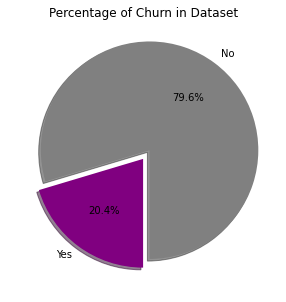

In [6]:
sizes = data['Exited'].value_counts(sort = True)
colors = ["grey","purple"] 
explode=(0.1,0.0)
labels={'No':1,'Yes':0}
rcParams['figure.figsize'] = 5,5
plt.pie(sizes,  colors=colors,explode=explode,labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [7]:
data.drop(['RowNumber'], axis=1,inplace=True)

In [8]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
data['Balance']=data['Balance'].astype(int)
data['EstimatedSalary']=data['EstimatedSalary'].astype(int)

In [11]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1
1,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113931,1
3,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510,1,1,1,79084,0


In [12]:
data['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data= pd.get_dummies(data, columns = ['Geography'], drop_first=True)

In [14]:
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,Female,42,2,0,1,1,1,101348,1,0,0
1,15647311,Hill,608,Female,41,1,83807,1,0,1,112542,0,0,1
2,15619304,Onio,502,Female,42,8,159660,3,1,0,113931,1,0,0
3,15701354,Boni,699,Female,39,1,0,2,0,0,93826,0,0,0
4,15737888,Mitchell,850,Female,43,2,125510,1,1,1,79084,0,0,1


In [15]:
data['Gender'].map({'Male':1,'Female':0})

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [16]:
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,Female,42,2,0,1,1,1,101348,1,0,0
1,15647311,Hill,608,Female,41,1,83807,1,0,1,112542,0,0,1
2,15619304,Onio,502,Female,42,8,159660,3,1,0,113931,1,0,0
3,15701354,Boni,699,Female,39,1,0,2,0,0,93826,0,0,0
4,15737888,Mitchell,850,Female,43,2,125510,1,1,1,79084,0,0,1


In [17]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Exited'>

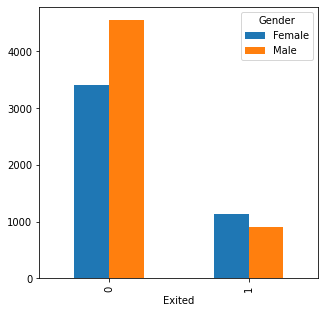

In [18]:
gender_column = data['Gender']
data.groupby(["Exited", gender_column]).size().unstack(level=1).plot(kind='bar',)

<AxesSubplot:>

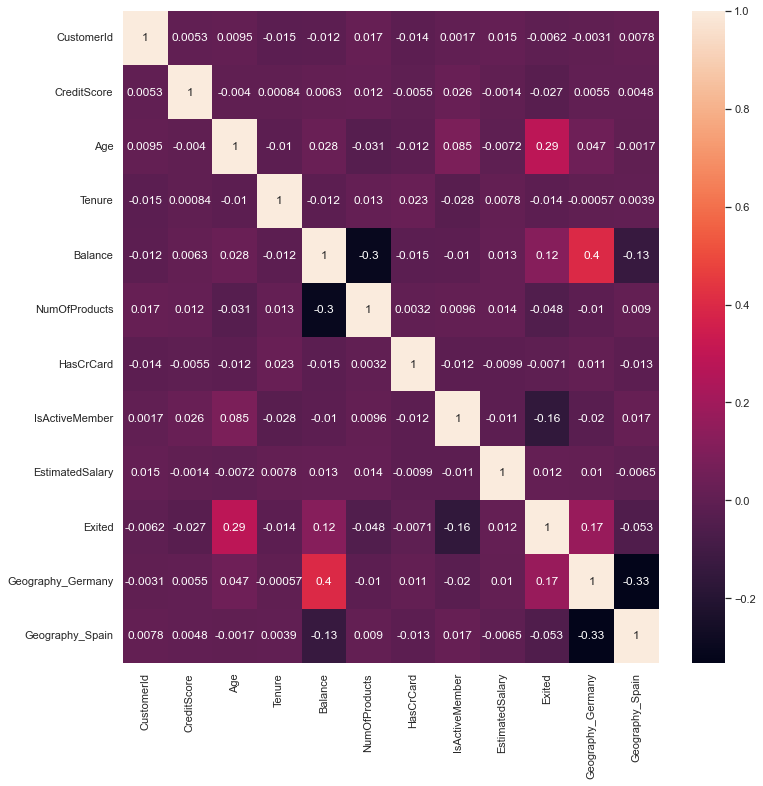

In [19]:
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(data.corr(),annot=data.corr())

In [20]:
data['Gender']=data['Gender'].map({'Male':1, 'Female':0})

In [21]:
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,2,0,1,1,1,101348,1,0,0
1,15647311,Hill,608,0,41,1,83807,1,0,1,112542,0,0,1
2,15619304,Onio,502,0,42,8,159660,3,1,0,113931,1,0,0
3,15701354,Boni,699,0,39,1,0,2,0,0,93826,0,0,0
4,15737888,Mitchell,850,0,43,2,125510,1,1,1,79084,0,0,1


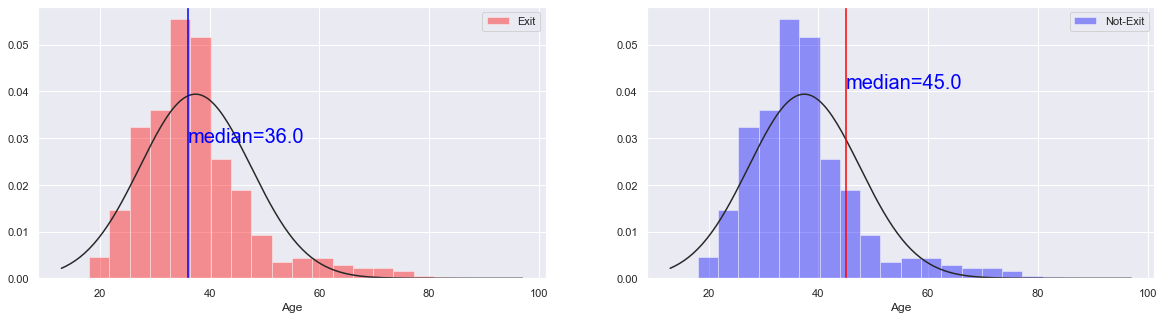

In [22]:
from scipy.stats import norm
fig,ax=plt.subplots(1,2,figsize=(20,5))
x=data[data['Exited']==0]['Age']
y=data[data['Exited']==1]['Age']
ax1=sns.distplot(x,label='Exit',color='red',bins=20,fit=norm,kde=False,ax=ax[0])
median_x=np.round(x.median(),2)
ax[0].axvline(np.median(x),color='blue')
trans_x=ax1.get_xaxis_transform()
plt.text(x.median(),.5,'median={median}'.format(median=median_x),transform=trans_x,color='blue',fontsize=20)
ax2=sns.distplot(x,label='Not-Exit',color='blue',bins=20,fit=norm,kde=False,ax=ax[1])
median_y=np.round(y.median(),2)
ax[1].axvline(np.median(y),color='red')
trans_y=ax2.get_xaxis_transform()
ax[1].text(y.median(),.7,'median={median}'.format(median=median_y),transform=trans_y,color='blue',fontsize=20)
ax[0].legend()
ax[1].legend()
plt.show()

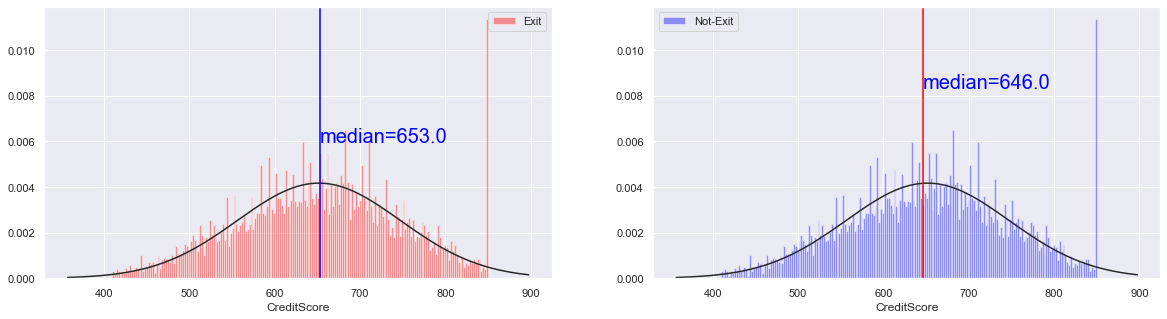

In [23]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
x=data[data['Exited']==0]['CreditScore']
y=data[data['Exited']==1]['CreditScore']
ax1=sns.distplot(x,label='Exit',color='red',bins=200,fit=norm,kde=False,ax=ax[0])
median_x=np.round(x.median(),2)
ax[0].axvline(np.median(x),color='blue')
trans_x=ax1.get_xaxis_transform()
plt.text(x.median(),.5,'median={median}'.format(median=median_x),transform=trans_x,color='blue',fontsize=20)
ax2=sns.distplot(x,label='Not-Exit',color='blue',bins=200,fit=norm,kde=False,ax=ax[1])
median_y=np.round(y.median(),2)
ax[1].axvline(np.median(y),color='red')
trans_y=ax2.get_xaxis_transform()
ax[1].text(y.median(),.7,'median={median}'.format(median=median_y),transform=trans_y,color='blue',fontsize=20)
ax[0].legend()
ax[1].legend()
plt.show()

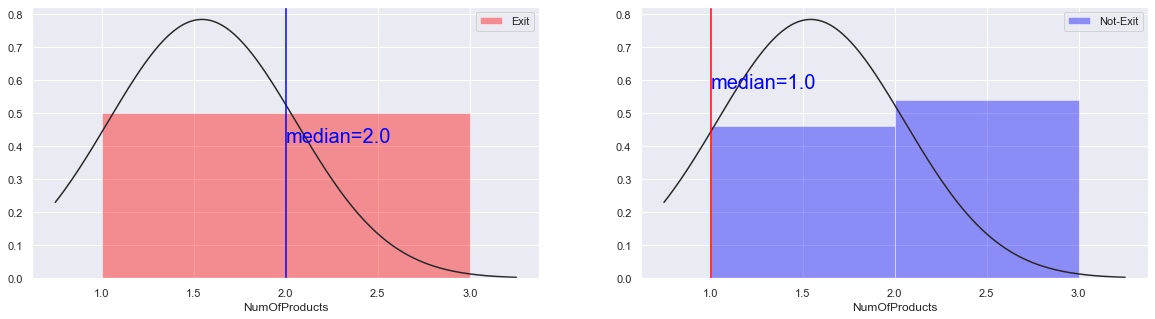

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
x=data[data['Exited']==0]['NumOfProducts']
y=data[data['Exited']==1]['NumOfProducts']
ax1=sns.distplot(x,label='Exit',color='red',bins=1,fit=norm,kde=False,ax=ax[0])
median_x=np.round(x.median(),2)
ax[0].axvline(np.median(x),color='blue')
trans_x=ax1.get_xaxis_transform()
plt.text(x.median(),.5,'median={median}'.format(median=median_x),transform=trans_x,color='blue',fontsize=20)
ax2=sns.distplot(x,label='Not-Exit',color='blue',bins=2,fit=norm,kde=False,ax=ax[1])
median_y=np.round(y.median(),2)
ax[1].axvline(np.median(y),color='red')
trans_y=ax2.get_xaxis_transform()
ax[1].text(y.median(),.7,'median={median}'.format(median=median_y),transform=trans_y,color='blue',fontsize=20)
ax[0].legend()
ax[1].legend()
plt.show()

In [25]:
data.describe()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700,0.250900,0.247700
std,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769,0.433553,0.431698
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,0.000000,0.000000
75%,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,1.000000,0.000000
max,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,1.000000


In [26]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [27]:
X=data[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']]
y=data[['Exited']]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [32]:
y_pred = logreg.predict(X_test)

Text(66.5, 0.5, 'Truth')

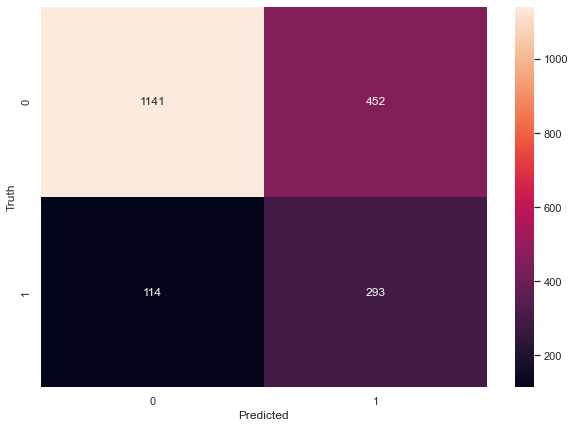

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import math
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
from sklearn.linear_model import LogisticRegression
lr_basemodel=LogisticRegression(class_weight={0:0.1,1:0.9}, max_iter=1000)

In [35]:
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, max_iter=1000)

In [36]:
y_pred_test = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1141  452]
 [ 114  293]]


In [37]:
#Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()

weights = np.linspace(0.0,0.99,500)

param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [38]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.49716325549178375
Best hyperparameters:  {'C': 0.1, 'class_weight': {0: 0.23014028056112223, 1: 0.7698597194388778}, 'penalty': 'l2'}


In [39]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.23,1:0.76},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.23, 1: 0.76})

In [40]:
y_pred_test_1 = lr2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test_1)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1220  373]
 [ 135  272]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [42]:
classifier_rf.oob_score_

0.84925

In [43]:
y_pred_rf = classifier_rf.predict(X_test)

Text(66.5, 0.5, 'Truth')

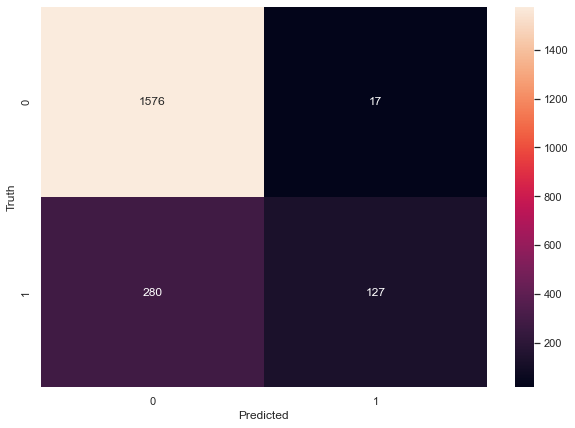

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 180 candidates, totalling 720 fits


0.8628750000000001

In [47]:
y_pred_rf_tuned = grid_search.predict(X_test)

Text(66.5, 0.5, 'Truth')

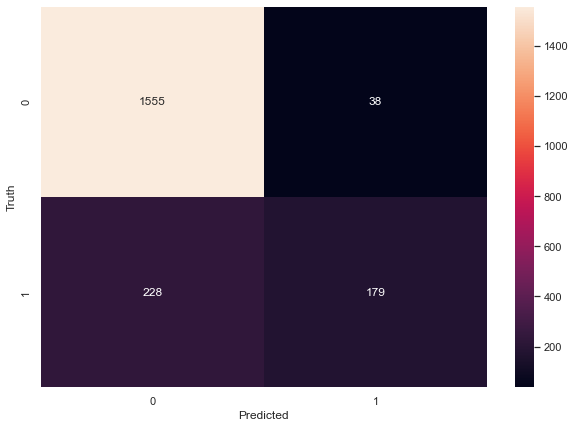

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dt = dtree.predict(X_test)

Text(66.5, 0.5, 'Truth')

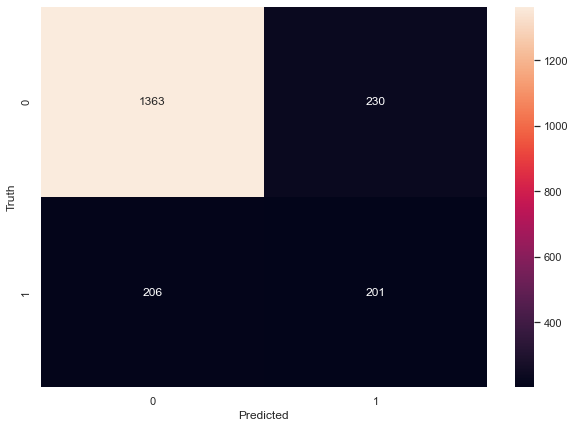

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [52]:
y_pred_nb = classifier.predict(X_test)

Text(66.5, 0.5, 'Truth')

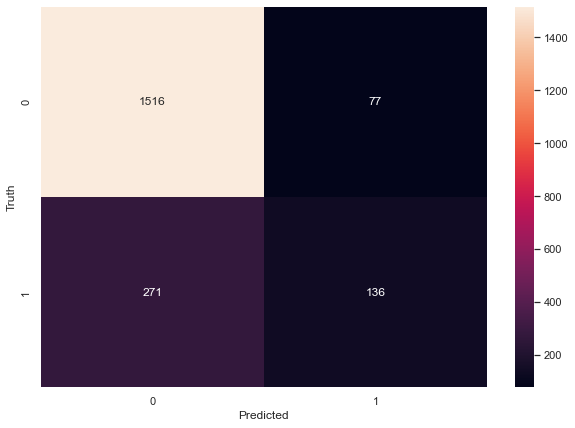

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')